In [1]:
from dotenv import load_dotenv
from ast import literal_eval
assert load_dotenv()

In [2]:
from langchain_community.tools.tavily_search import TavilySearchResults
tools = [TavilySearchResults(max_results=3)]

/var/folders/1l/j222hwk11cj0nfv_cpclhdtm0000gn/T/ipykernel_83389/2562688541.py:2: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tools = [TavilySearchResults(max_results=3)]


In [15]:
from langchain import hub
prompt = hub.pull("hwchase17/react")
print(prompt.template)

Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: {input}
Thought:{agent_scratchpad}


In [ ]:
from langchain_openai import ChatOpenAI
base_url="https://ark.cn-beijing.volces.com/api/v3"

# model="doubao-1.5-pro-32k-250115"
model="doubao-seed-1-6-thinking-250715"
llm = ChatOpenAI(model=model, temperature=0, api_key=api_key, base_url=base_url)

from langchain.agents import AgentExecutor, create_react_agent
agent = create_react_agent(llm, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools, handle_parsing_errors=True)
agent_executor.invoke({'input': 'What is the hometown of the current Australia open winner?'})

{'input': 'What is the hometown of the current Australia open winner?',
 'output': "The 2024 Australian Open men's singles winner Jannik Sinner is from Innichen, Italy, and the women's singles winner Aryna Sabalenka is from Minsk, Belarus."}

In [7]:
from langgraph.prebuilt import create_react_agent
agent = create_react_agent(model=llm, tools=tools)

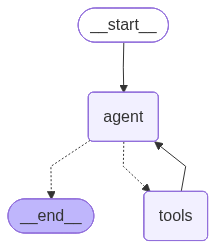

In [8]:
from IPython.display import Image, display
display(Image(agent.get_graph(xray=True).draw_mermaid_png()))

In [9]:
response = agent.invoke({'messages':[{'role': 'user', 'content': 'What is the hometown of the current Australia open winner?'}]})

In [10]:
from rich.pretty import pprint
pprint(response)

{
│   'messages': [
│   │   HumanMessage(
│   │   │   content='What is the hometown of the current Australia open winner?',
│   │   │   additional_kwargs={},
│   │   │   response_metadata={},
│   │   │   id='5c059461-cb36-4d0c-82ea-c597f5749a5e'
│   │   ),
│   │   AIMessage(
│   │   │   content='',
│   │   │   additional_kwargs={
│   │   │   │   'tool_calls': [
│   │   │   │   │   {
│   │   │   │   │   │   'id': 'call_q7opf1sxz29pwofwrda6x24m',
│   │   │   │   │   │   'function': {
│   │   │   │   │   │   │   'arguments': '{"query":"hometown of current Australia Open winner"}',
│   │   │   │   │   │   │   'name': 'tavily_search_results_json'
│   │   │   │   │   │   },
│   │   │   │   │   │   'type': 'function'
│   │   │   │   │   }
│   │   │   │   ],
│   │   │   │   'refusal': None
│   │   │   },
│   │   │   response_metadata={
│   │   │   │   'token_usage': {
│   │   │   │   │   'completion_tokens': 283,
│   │   │   │   │   'prompt_tokens': 410,
│   │   │   │   │   'total_tokens': 693,
│   │   │   │   │   'completion_tokens_details': {
│   │   │   │   │   │   'accepted_prediction_tokens': None,
│   │   │   │   │   │   'audio_tokens': None,
│   │   │   │   │   │   'reasoning_tokens': 246,
│   │   │   │   │   │   'rejected_prediction_tokens': None
│   │   │   │   │   },
│   │   │   │   │   'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}
│   │   │   │   },
│   │   │   │   'model_name': 'doubao-seed-1-6-thinking-250715',
│   │   │   │   'system_fingerprint': None,
│   │   │   │   'finish_reason': 'tool_calls',
│   │   │   │   'logprobs': None
│   │   │   },
│   │   │   id='run--f7045b07-6b9f-4d65-b066-3abd47da81f1-0',
│   │   │   tool_calls=[
│   │   │   │   {
│   │   │   │   │   'name': 'tavily_search_results_json',
│   │   │   │   │   'args': {'query': 'hometown of current Australia Open winner'},
│   │   │   │   │   'id': 'call_q7opf1sxz29pwofwrda6x24m',
│   │   │   │   │   'type': 'tool_call'
│   │   │   │   }
│   │   │   ],
│   │   │   usage_metadata={
│   │   │   │   'input_tokens': 410,
│   │   │   │   'output_tokens': 283,
│   │   │   │   'total_tokens': 693,
│   │   │   │   'input_token_details': {'cache_read': 0},
│   │   │   │   'output_token_details': {'reasoning': 246}
│   │   │   }
│   │   ),
│   │   ToolMessage(
│   │   │   content='[{"title": "Australian Open - Wikipedia", "url": "https://en.wikipedia.org/wiki/Australian_Open", "content": "|  |  |\\n --- |\\n|  | |\\n| Official website | |\\n| Founded | 1905; 120 years ago (1905) |\\n| Editions | 113 (2025)  113 Grand Slam \\"Grand Slam (tennis)\\") events |\\n| Location | Melbourne CBD Australia |\\n| Venue | Melbourne Park |\\n| Surface | Hard – outdoors (since 1988) Grass – outdoors (1905–1987) |\\n| Prize money | A$96,500,000 (2025) |\\n| Men\'s | |\\n| Draw | 128S (128Q) / 64D (16Q) |\\n| Current champions | Jannik Sinner (singles)   Harri Heliövaara  Henry Patten (doubles) | [...] Wikipedia\\n\\n# Australian Open\\n\\nThe Australian Open (stylised ΛO) is a tennis tournament organised by Tennis Australia annually at Melbourne Park in Melbourne, Victoria \\"Victoria (state)\\"), Australia. It is chronologically the first of the four Grand Slam \\"Grand Slam (tennis)\\") tennis events every year, held before the French Open, Wimbledon and the US Open \\"US Open (tennis)\\").\\n\\nAustralian Open [...] During World War II, the tournament was not held from 1941 to 1945.\\nIn 1972, it was decided to stage the tournament in Melbourne each year because it attracted the biggest patronage of any Australian city. The tournament was played at the Kooyong Lawn Tennis Club from 1972 until its move to the new Flinders Park complex in 1988.", "score": 0.6342494}, {"title": "Novak Djokovic handed tough Australian Open draw", "url": "https://gulfnews.com/sport/tennis/novak-djokovic-handed-tough-australian-open-draw-1.500013036", "content": "# Novak Djokovic handed tough Australian Open draw\\n\\nFormer world No 1 Serbian to meet Alcaraz in quarters as Sinn